In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import NonlinearConstraint

In [2]:
from truss import Node, Bar, Truss

In [3]:
n00 = Node(0,0.25,freex=False, freey=False)
n01 = Node(1,0.25, freey=False)
n11 = Node(0.5,0.5)
n11.apply_load(0, -10**3) 
 
nodes = [Node(np.random.rand(),np.random.rand()) for n in range(3)]
nodes = [n00, n01, n11] + nodes

randTruss = Truss.from_delaunay(nodes)


In [4]:
randTruss.set_all_widths(0.02)

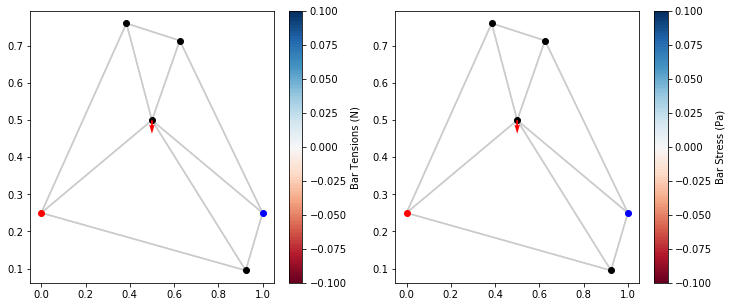

In [5]:
randTruss.plot()

In [6]:
randTruss.solve()

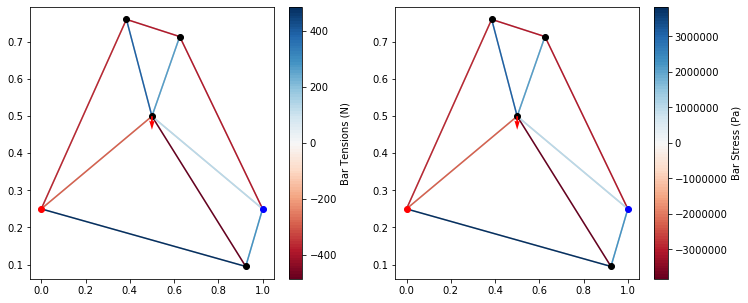

In [7]:
randTruss.plot()

In [8]:
randTruss.mass()

1.656322100641165

In [9]:
randTruss.details()

(   ID     x (m)     y (m)  Free x?  Free y?  Force x (N)  Force y (N)  \
 0   0  0.384740  0.761306     True     True            0            0   
 1   1  0.000000  0.250000    False    False            0            0   
 2   2  0.923640  0.094789     True     True            0            0   
 3   3  0.500000  0.500000     True     True            0        -1000   
 4   4  0.625549  0.714861     True     True            0            0   
 5   5  1.000000  0.250000     True    False            0            0   
 
    Delta x (mm)  Delta y (mm)  
 0      0.033772     -0.057662  
 1      0.000000      0.000000  
 2      0.051279      0.001651  
 3      0.018896     -0.077964  
 4      0.020626     -0.070459  
 5      0.067033      0.000000  ,
    ID         Node 0         Node 1  E (GPa)  Yield (MPa)  w (mm)  t (mm)  \
 0   0  N(0.00, 0.25)  N(0.38, 0.76)     71.0        300.0    20.0    6.35   
 1   1  N(0.00, 0.25)  N(0.50, 0.50)     71.0        300.0    20.0    6.35   
 2   2  N(0.00

In [10]:
sol=randTruss.miminize_mass(keep_feasible=True, method='SLSQP')

/Users/Devansh/anaconda3/lib/python3.6/site-packages/scipy/optimize/_constraints.py:331: OptimizeWarning: Constraint options `finite_diff_jac_sparsity`, `finite_diff_rel_step`, `keep_feasible`, and `hess`are ignored by this method.
  "are ignored by this method.", OptimizeWarning)


In [11]:
sol

     fun: 0.5761233331222193
     jac: array([10.97089922,  9.58434637, 16.05784415,  4.26657905, 10.05093645,
        4.89655586,  4.20475996, 10.23413151,  2.96570612,  9.58434637])
 message: 'Optimization terminated successfully.'
    nfev: 278
     nit: 24
    njev: 20
  status: 0
 success: True
       x: array([0.00933176, 0.01550541, 0.00072276, 0.00013125, 0.02033589,
       0.00019553, 0.0038859 , 0.00870198, 0.00042594, 0.0001    ])

0.5761233331222193


(   ID     x (m)     y (m)  Free x?  Free y?  Force x (N)  Force y (N)  \
 0   0  0.384740  0.761306     True     True            0            0   
 1   1  0.000000  0.250000    False    False            0            0   
 2   2  0.923640  0.094789     True     True            0            0   
 3   3  0.500000  0.500000     True     True            0        -1000   
 4   4  0.625549  0.714861     True     True            0            0   
 5   5  1.000000  0.250000     True    False            0            0   
 
    Delta x (mm)  Delta y (mm)  
 0      0.726109     -0.589613  
 1      0.000000      0.000000  
 2      1.636274     -0.445009  
 3      0.696713     -1.481863  
 4      0.678303     -0.659212  
 5      1.437634      0.000000  ,
    ID         Node 0         Node 1  E (GPa)  Yield (MPa)     w (mm)  t (mm)  \
 0   0  N(0.00, 0.25)  N(0.38, 0.76)     71.0        300.0   9.331756    6.35   
 1   1  N(0.00, 0.25)  N(0.50, 0.50)     71.0        300.0  15.505414    6.35   
 2   

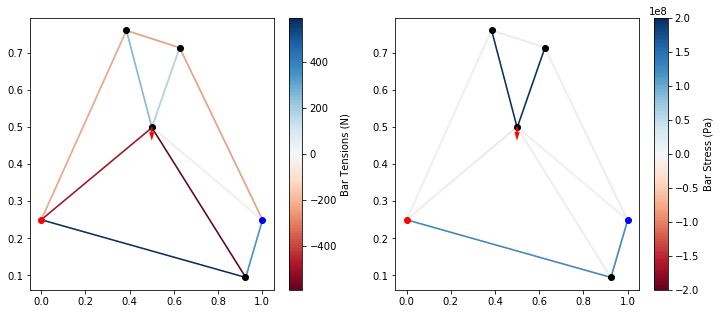

In [12]:
randTruss.set_widths(sol.x)
randTruss.plot()
print(randTruss.mass())
randTruss.solve()
randTruss.details()

In [13]:
max_deflections = [(n11, None, None, -1e-3, None)]
sol=randTruss.miminize_mass(max_deflections)

/Users/Devansh/anaconda3/lib/python3.6/site-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method COBYLA cannot handle bounds.
  RuntimeWarning)
/Users/Devansh/Documents/GitHub/AVD_Initial_Sizing/Detailed_Design/truss.py:539: UserWarning: Optimization hasn't been successful! Please check!
  warnings.warn("Optimization hasn't been successful! Please check!")


In [14]:
sol

     fun: 10.162271359969562
   maxcv: 0.08767104190405917
 message: 'Did not converge to a solution satisfying the constraints. See `maxcv` for magnitude of violation.'
    nfev: 99
  status: 4
 success: False
       x: array([9.33538370e-03, 1.55041882e-02, 8.16885990e-04, 1.46482665e-04,
       2.03338048e-02, 2.20501921e-04, 3.88705378e-03, 8.70501607e-03,
       4.41872806e-04, 1.00010133e+00])

In [15]:
sol.maxcv

0.08767104190405917

10.162271359969562


(   ID     x (m)     y (m)  Free x?  Free y?  Force x (N)  Force y (N)  \
 0   0  0.384740  0.761306     True     True            0            0   
 1   1  0.000000  0.250000    False    False            0            0   
 2   2  0.923640  0.094789     True     True            0            0   
 3   3  0.500000  0.500000     True     True            0        -1000   
 4   4  0.625549  0.714861     True     True            0            0   
 5   5  1.000000  0.250000     True    False            0            0   
 
    Delta x (mm)  Delta y (mm)  
 0      0.652896     -0.534531  
 1      0.000000      0.000000  
 2      1.444225     -0.413115  
 3      0.620320     -1.329049  
 4      0.607134     -0.593477  
 5      1.284845      0.000000  ,
    ID         Node 0         Node 1  E (GPa)  Yield (MPa)       w (mm)  \
 0   0  N(0.00, 0.25)  N(0.38, 0.76)     71.0        300.0     9.335384   
 1   1  N(0.00, 0.25)  N(0.50, 0.50)     71.0        300.0    15.504188   
 2   2  N(0.00, 0.25)  

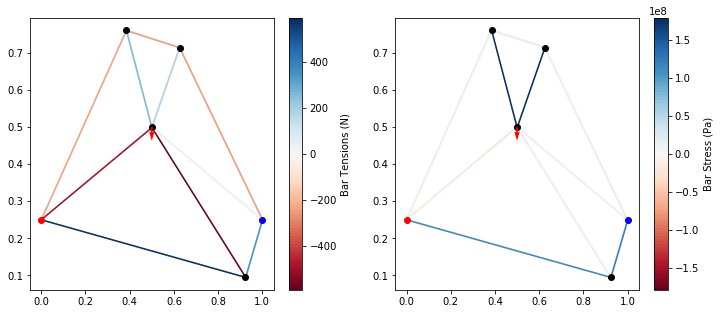

In [16]:
randTruss.set_widths(sol.x)
randTruss.plot()
print(randTruss.mass())
randTruss.solve()
randTruss.details()

In [17]:
randTruss.nodes

[N(0.38, 0.76),
 N(0.00, 0.25),
 N(0.92, 0.09),
 N(0.50, 0.50),
 N(0.63, 0.71),
 N(1.00, 0.25)]

In [18]:
randTruss.mass()

10.162271359969562